# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# PCA implementation

In [2]:

def pca(data, pc_count = None):
    """
    Principal component analysis using eigenvalues
    """
    data -= np.mean(data, 0)
    
    covariance_matrix = np.cov(data, rowvar=False)
    
    eigen_value, eigen_vector = LA.eigh(covariance_matrix)
    
    key = np.argsort(eigen_value)[::-1][:pc_count]
    
    eigen_value, eigen_vector = eigen_value[key], eigen_vector[:, key]
    
    U = np.dot(eigen_vector.T, data.T).T 
    
    return U


# Loading the Iris Dataset

In [3]:
df = "iris.csv"
data = np.loadtxt(df, delimiter=',',usecols=(0,1,2,3)) # strippig the class labels off the dataset

## PCA using the first 2 principle components of Iris Dataset

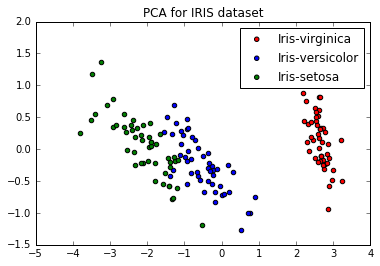

In [4]:
pca_iris = pca(data, 2)
plt.figure()
# The labels are are divided in a group of 50 in the given dataset
plt.scatter(pca_iris[:50, 0], pca_iris[:50, 1], c = 'r',label="Iris-virginica") 
plt.scatter(pca_iris[50:100, 0], pca_iris[50:100, 1], c = 'b',label="Iris-versicolor")
plt.scatter(pca_iris[100:, 0], pca_iris[100:, 1], c = 'g',label="Iris-setosa")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA for IRIS dataset')

plt.show()

## Tsne of Iris datset using the inbuilt function


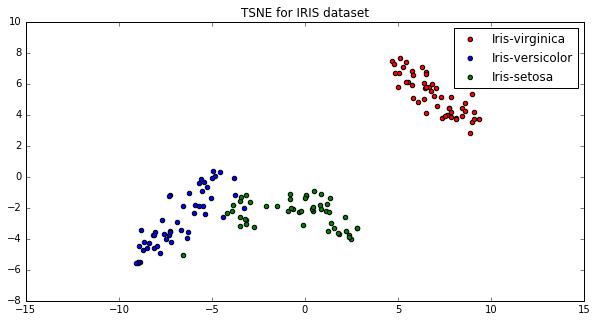

In [5]:

X_tsne = TSNE(learning_rate=100,random_state=400).fit_transform(data)
plt.figure(figsize=(10, 5))

plt.scatter(X_tsne[:50, 0], X_tsne[:50, 1], c='r',label="Iris-virginica")
plt.scatter(X_tsne[50:100, 0], X_tsne[50:100, 1], c='b',label="Iris-versicolor")
plt.scatter(X_tsne[100:, 0], X_tsne[100:, 1], c='g',label="Iris-setosa")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('TSNE for IRIS dataset')
plt.show()

## Generating  swiss_roll data from the inbuilt function

In [18]:
from sklearn.datasets import make_swiss_roll 

data, color = make_swiss_roll(n_samples=1500,noise=0,random_state=None)
X_tsne = TSNE(learning_rate=100,random_state=12)
X_tsne = X_tsne.fit_transform(data)
X_pca = pca(data)

## Inbuilt Tsne and User defined PCA for swiss_roll dataset

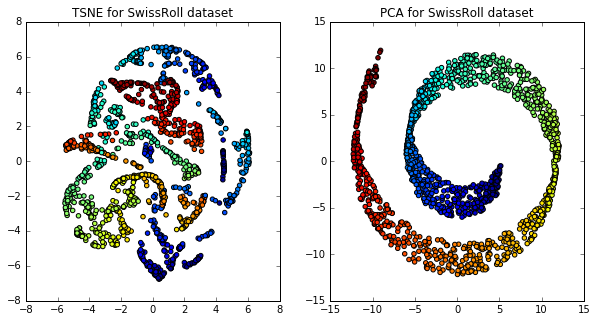

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
plt.title('TSNE for SwissRoll dataset')
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
plt.title('PCA for SwissRoll dataset')


plt.show()

# Report

## Iris Dataset

The PCA ananlysis on the iris dataset using the first 2 components seperates the data into 2 distinct parts , if we use 3 dimensions indeed we can seperate the data completely

The Tsne on Iris dataset also seperates the dataset into 2 distinct parts.

It can be noted that the Tsne combines the 2 classes whcih was done by the PCA.

## Conclusion

PCA and Tsne both work do a good job in seperating the data.

## Swiss roll dataset

PCA seperates the data into a spiraling structure .
Tsne doesn't seem to seperate the data well

## Conclusion

Tsne does not seperate the data as well as PCA for the swiss_roll dataset